In [1]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys

import plotting
import gym_watertank
from collections import defaultdict

matplotlib.style.use('ggplot')

In [2]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn


In [3]:
env = gym.make('watertank-v0', use_shield=False)

Initializing a dummy shield
No actions are filtered here


In [4]:
def q_learning(env, num_episodes, discount_factor=0.99, alpha=0.5, epsilon=0.1):
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(2))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, 2)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        
        # One step in the environment
        # total_reward = 0.0
        for t in itertools.count():
            
            # Take a step
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
                
            if done:
                break
                
            if t > 500:
                break
                
            state = next_state
    
    return Q, stats


In [10]:
Q, stats = q_learning(env, 500)

Episode 500/500.

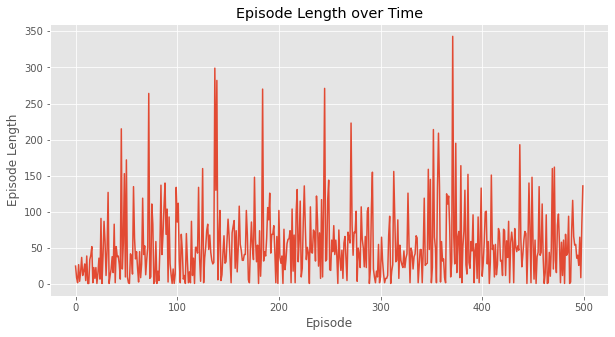

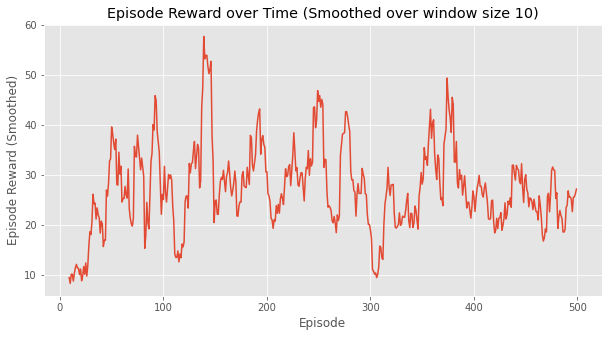

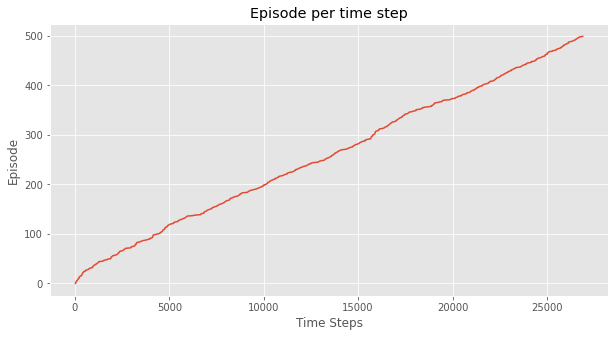

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [11]:
plotting.plot_episode_stats(stats)

In [7]:
shielded_env = gym.make('watertank-v0', use_shield=True)

Initializing the real shield
The shielded actions function returns the set of safe actions in a state


In [8]:
Q, stats = q_learning(shielded_env, 500)

Episode 500/500.

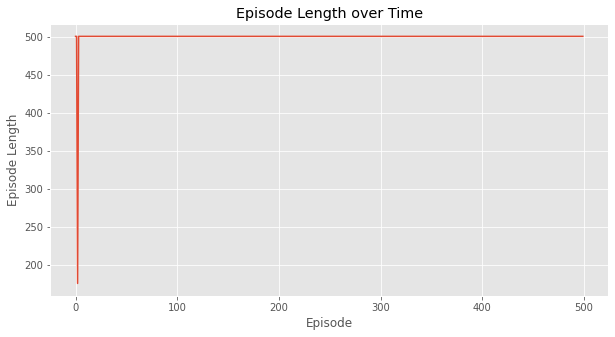

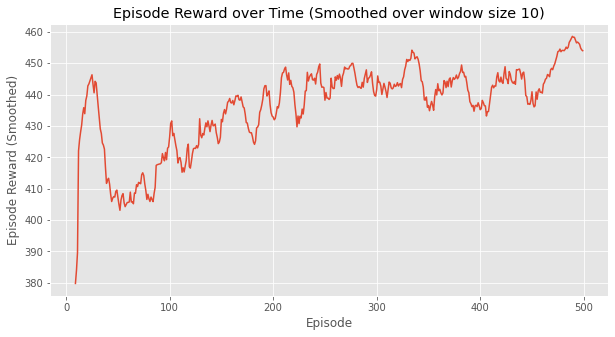

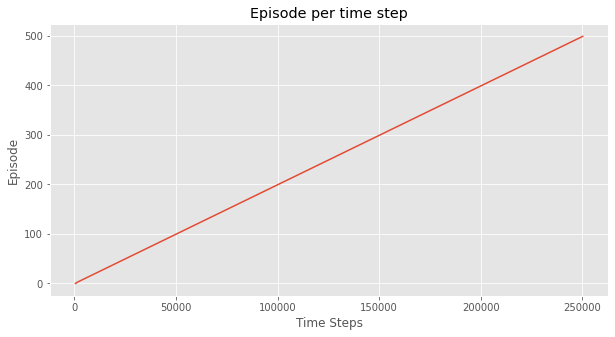

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [9]:
plotting.plot_episode_stats(stats)

In [6]:
for t in range(100):
    # Take a step
    action_probs = [0.5, 0.5]
    action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
    next_state, reward, done, _ = env.step(action)
    print("time step : ", t)
    print(env.reverse_state_mapper[state], action, env.reverse_state_mapper[next_state], reward, done)
    state = next_state
    if done:
        print("episode over")
        state = env.reset()
    

reward :  0.01451435881297125
time step :  0
(50, 1) 0 (49, -3) 0.01451435881297125 False
reward :  -2
time step :  1
(49, -3) 1 (-1, 0) -2 True
episode over
reward :  0.01451435881297125
time step :  2
(50, 1) 0 (49, -3) 0.01451435881297125 False
reward :  -2
time step :  3
(49, -3) 1 (-1, 0) -2 True
episode over
reward :  0.01451435881297125
time step :  4
(50, 1) 0 (49, -3) 0.01451435881297125 False
reward :  -2
time step :  5
(49, -3) 1 (-1, 0) -2 True
episode over
reward :  0.006042659034150688
time step :  6
(50, 1) 1 (51, 1) 0.006042659034150688 False
reward :  -0.02956268768317616
time step :  7
(51, 1) 0 (50, -3) -0.02956268768317616 False
reward :  -0.02956268768317616
time step :  8
(50, -3) 0 (50, -2) -0.02956268768317616 False
reward :  -0.02956268768317616
time step :  9
(50, -2) 0 (50, -1) -0.02956268768317616 False
reward :  0.01451435881297125
time step :  10
(50, -1) 0 (49, -1) 0.01451435881297125 False
reward :  0.12989799142550784
time step :  11
(49, -1) 0 (48, -1)